
---- PARTE 1 ----
[02-20 15:41:34][INFO] Solución exacta: [[5. 2.]]
[02-20 15:41:34][INFO] Jacobi i= 0 x: [[1. 1.]]
[02-20 15:41:34][INFO] Jacobi i= 1 x: [[6.  0.4]]
[02-20 15:41:34][INFO] Jacobi i= 2 x: [[6.6 2.4]]
[02-20 15:41:34][INFO] Jacobi i= 3 x: [[4.6  2.64]]


[02-20 15:41:34][INFO] Jacobi i= 4 x: [[4.36 1.84]]
[02-20 15:41:34][INFO] Jacobi i= 5 x: [[5.16  1.744]]
[02-20 15:41:34][INFO] Jacobi i= 6 x: [[5.256 2.064]]
[02-20 15:41:34][INFO] Jacobi i= 7 x: [[4.936  2.1024]]
[02-20 15:41:34][INFO] Jacobi i= 8 x: [[4.8976 1.9744]]
[02-20 15:41:34][INFO] Jacobi i= 9 x: [[5.0256  1.95904]]
[02-20 15:41:34][INFO] Jacobi i= 10 x: [[5.04096 2.01024]]
[02-20 15:41:34][INFO] Jacobi i= 11 x: [[4.98976  2.016384]]
[02-20 15:41:34][INFO] Jacobi i= 12 x: [[4.983616 1.995904]]
[02-20 15:41:34][INFO] Jacobi i= 13 x: [[5.004096  1.9934464]]
[02-20 15:41:34][INFO] Jacobi i= 14 x: [[5.0065536 2.0016384]]
[02-20 15:41:34][INFO] Jacobi i= 15 x: [[4.9983616  2.00262144]]
[02-20 15:41:35][INFO] Jacobi i= 16 x: [[4.99737856 1.99934464]]
[02-20 15:41:35][INFO] Jacobi i= 17 x: [[5.00065536 1.99895142]]
[02-20 15:41:35][INFO] Jacobi i= 18 x: [[5.00104858 2.00026214]]
[02-20 15:41:35][INFO] Jacobi i= 19 x: [[4.99973786 2.00041943]]
[02-20 15:41:35][INFO] Jacobi i= 20 x:

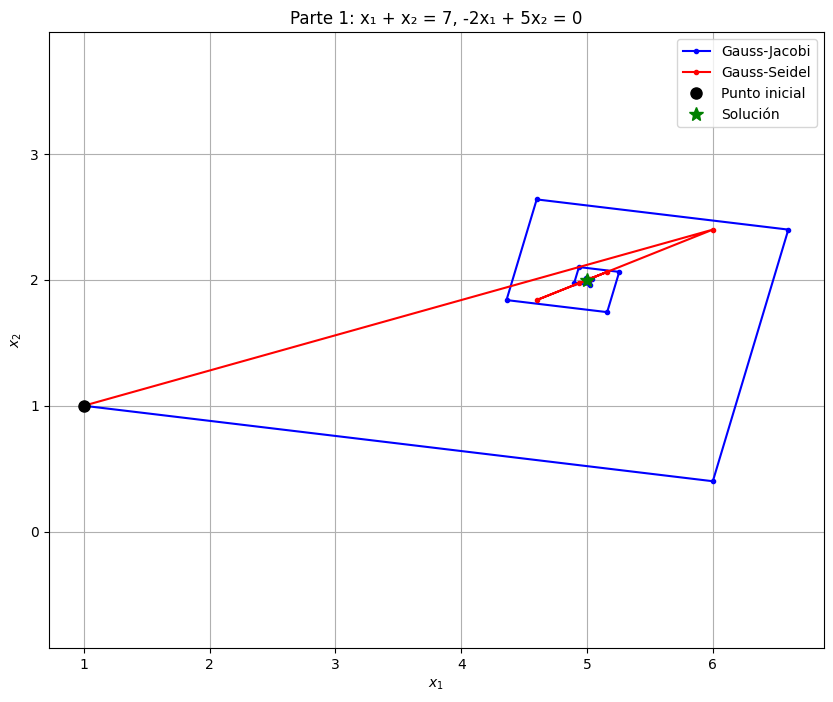

Solución exacta: x₁ = 5.0000, x₂ = 2.0000
Solución Jacobi: x₁ = 5.0000, x₂ = 2.0000
Solución Seidel: x₁ = 5.0000, x₂ = 2.0000

---- PARTE 2 ----
[02-20 15:41:35][INFO] Solución exacta: [[2. 4.]]
[02-20 15:41:35][INFO] Jacobi i= 0 x: [[1. 1.]]
[02-20 15:41:35][INFO] Jacobi i= 1 x: [[5. 2.]]
[02-20 15:41:35][INFO] Jacobi i= 2 x: [[ 4. 10.]]
[02-20 15:41:35][INFO] Jacobi i= 3 x: [[-4.  8.]]
[02-20 15:41:35][INFO] Jacobi i= 4 x: [[-2. -8.]]
[02-20 15:41:35][INFO] Jacobi i= 5 x: [[14. -4.]]
[02-20 15:41:35][INFO] Jacobi i= 6 x: [[10. 28.]]
[02-20 15:41:35][INFO] Jacobi i= 7 x: [[-22.  20.]]
[02-20 15:41:35][INFO] Jacobi i= 8 x: [[-14. -44.]]
[02-20 15:41:35][INFO] Jacobi i= 9 x: [[ 50. -28.]]
[02-20 15:41:35][INFO] Jacobi i= 10 x: [[ 34. 100.]]
[02-20 15:41:35][INFO] Jacobi i= 11 x: [[-94.  68.]]
[02-20 15:41:35][INFO] Jacobi i= 12 x: [[ -62. -188.]]
[02-20 15:41:35][INFO] Jacobi i= 13 x: [[ 194. -124.]]
[02-20 15:41:35][INFO] Jacobi i= 14 x: [[130. 388.]]
[02-20 15:41:35][INFO] Jacobi i= 1

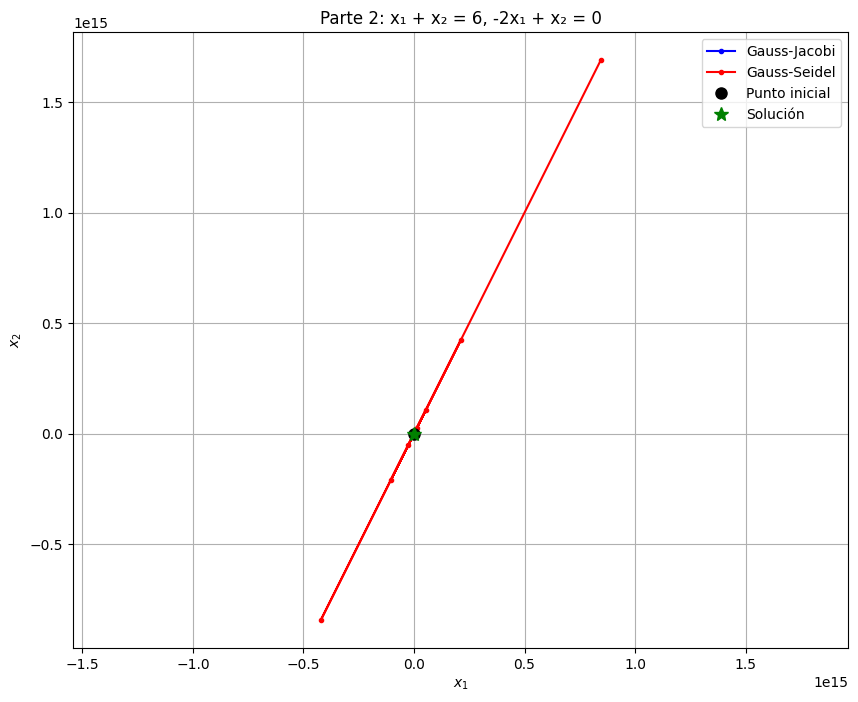

Solución exacta: x₁ = 2.0000, x₂ = 4.0000
Solución Jacobi: x₁ = 50331650.0000, x₂ = -33554428.0000
Solución Seidel: x₁ = 844424930131970.0000, x₂ = 1688849860263940.0000


In [5]:

"""
Python 3
20 / 02 / 2025
Jonathan Paredes
@author: solution based on z_tjona's code

Visualización de los métodos de Gauss-Jacobi y Gauss-Seidel
para sistemas de ecuaciones lineales
"""


# Funciones de los métodos iterativos
def gauss_jacobi(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int, store_path=False
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.
    """

    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    path = [x.copy()] if store_path else None

    logging.info(f"Jacobi i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if store_path:
            path.append(x_new.copy())
            
        if np.linalg.norm(x_new - x) < tol:
            logging.info(f"Jacobi convergió en {k} iteraciones")
            return (x_new, path) if store_path else x_new

        x = x_new.copy()
        logging.info(f"Jacobi i= {k} x: {x.T}")

    logging.warning(f"Jacobi alcanzó el máximo de iteraciones ({max_iter})")
    return (x, path) if store_path else x


def gauss_seidel(
    *, A: np.array, b: np.array, x0: np.array, tol: float, max_iter: int, store_path=False
) -> np.array:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x0, np.ndarray):
        x0 = np.array(x0, dtype=float, ndmin=2).T
    assert x0.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    x = x0.copy()
    path = [x.copy()] if store_path else None

    logging.info(f"Seidel i= {0} x: {x.T}")
    for k in range(1, max_iter):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma1 = sum([A[i, j] * x_new[j] for j in range(i)])
            suma2 = sum([A[i, j] * x[j] for j in range(i, n) if j != i])
            x_new[i] = (b[i] - suma1 - suma2) / A[i, i]

        if store_path:
            path.append(x_new.copy())
            
        if np.linalg.norm(x_new - x) < tol:
            logging.info(f"Seidel convergió en {k} iteraciones")
            return (x_new, path) if store_path else x_new

        x = x_new.copy()
        logging.info(f"Seidel i= {k} x: {x.T}")

    logging.warning(f"Seidel alcanzó el máximo de iteraciones ({max_iter})")
    return (x, path) if store_path else x


def plot_trajectories(jacobi_path, seidel_path, solution, title="Comparación de Métodos Iterativos"):
    """Grafica las trayectorias de los métodos de Jacobi y Seidel."""
    plt.figure(figsize=(10, 8))
    
    # Convertir las listas de arrays a arrays regulares para facilitar el trazado
    jx = np.array([p[0, 0] for p in jacobi_path])
    jy = np.array([p[1, 0] for p in jacobi_path])
    
    sx = np.array([p[0, 0] for p in seidel_path])
    sy = np.array([p[1, 0] for p in seidel_path])
    
    # Trazar las trayectorias
    plt.plot(jx, jy, 'b.-', label='Gauss-Jacobi', linewidth=1.5)
    plt.plot(sx, sy, 'r.-', label='Gauss-Seidel', linewidth=1.5)
    
    # Marcar el punto inicial
    plt.plot(jx[0], jy[0], 'ko', markersize=8, label='Punto inicial')
    
    # Marcar la solución
    sol_x, sol_y = solution[0, 0], solution[1, 0]
    plt.plot(sol_x, sol_y, 'g*', markersize=10, label='Solución')
    
    # Configuración del gráfico
    plt.grid(True)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)
    plt.legend()
    
    # Ajustar los límites para mostrar bien la trayectoria
    plt.axis('equal')
    
    return plt

# Función principal para resolver y visualizar el sistema
def solve_and_visualize(A, b, x0, title):
    # Parámetros para los métodos iterativos
    tol = 1e-6
    max_iter = 50
    
    # Solución exacta (para referencia)
    exact_solution = np.linalg.solve(A, b)
    logging.info(f"Solución exacta: {exact_solution.T}")
    
    # Resolver con ambos métodos
    xj, jacobi_path = gauss_jacobi(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter, store_path=True)
    xs, seidel_path = gauss_seidel(A=A, b=b, x0=x0, tol=tol, max_iter=max_iter, store_path=True)
    
    logging.info(f"Solución Jacobi: {xj.T}")
    logging.info(f"Solución Seidel: {xs.T}")
    
    # Visualizar las trayectorias
    plt = plot_trajectories(jacobi_path, seidel_path, exact_solution, title)
    return plt, xj, xs, exact_solution

# ------------------------ PARTE 1 ------------------------
def parte1():
    print("\n---- PARTE 1 ----")
    # Sistema: x₁ + x₂ = 7, -2x₁ + 5x₂ = 0
    A = np.array([[1, 1], [-2, 5]], dtype=float)
    b = np.array([[7], [0]], dtype=float)
    x0 = np.array([[1], [1]], dtype=float)
    
    plt, xj, xs, exact = solve_and_visualize(A, b, x0, "Parte 1: x₁ + x₂ = 7, -2x₁ + 5x₂ = 0")
    plt.savefig("parte1_trayectorias.png")
    plt.show()
    
    print(f"Solución exacta: x₁ = {exact[0,0]:.4f}, x₂ = {exact[1,0]:.4f}")
    print(f"Solución Jacobi: x₁ = {xj[0,0]:.4f}, x₂ = {xj[1,0]:.4f}")
    print(f"Solución Seidel: x₁ = {xs[0,0]:.4f}, x₂ = {xs[1,0]:.4f}")

# ------------------------ PARTE 2 ------------------------
def parte2():
    print("\n---- PARTE 2 ----")
    # Sistema: x₁ + x₂ = 6, -2x₁ + x₂ = 0
    A = np.array([[1, 1], [-2, 1]], dtype=float)
    b = np.array([[6], [0]], dtype=float)
    x0 = np.array([[1], [1]], dtype=float)
    
    plt, xj, xs, exact = solve_and_visualize(A, b, x0, "Parte 2: x₁ + x₂ = 6, -2x₁ + x₂ = 0")
    plt.savefig("parte2_trayectorias.png")
    plt.show()
    
    print(f"Solución exacta: x₁ = {exact[0,0]:.4f}, x₂ = {exact[1,0]:.4f}")
    print(f"Solución Jacobi: x₁ = {xj[0,0]:.4f}, x₂ = {xj[1,0]:.4f}")
    print(f"Solución Seidel: x₁ = {xs[0,0]:.4f}, x₂ = {xs[1,0]:.4f}")

# Ejecutar ambas partes
if __name__ == "__main__":
    parte1()
    parte2()